In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df= pd.read_csv("D:\ML\diabetes.csv", header=None, names=col_names)


In [28]:
df.head(30)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [29]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

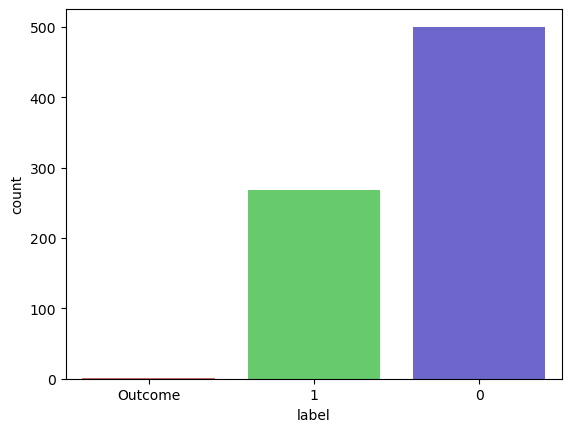

In [30]:
sns.countplot(x='label' ,data=df,palette='hls')
plt.show()


In [31]:
df.groupby('label').mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3504\2301036914.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('label').mean()


""
label
0
1
Outcome


In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load your dataset into a DataFrame (assuming your data is in a pandas DataFrame format)
# df = pd.read_csv("your_dataset.csv")

# Example data with a column 'Pregnancies' containing string values
data = {'Pregnancies': ['1', '2', '3', '4', '5'],
        'Outcome': [0, 1, 0, 1, 0]}  # Assuming 'Outcome' is the target variable

df = pd.DataFrame(data)

# Convert 'Pregnancies' column from string to float
df['Pregnancies'] = df['Pregnancies'].astype(float)

# Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Initialize StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=16)

# Fit the model with scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict using the scaled testing data
y_pred = logreg.predict(X_test_scaled)

# Further analysis and evaluation...


In [35]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [36]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 1],
       [0, 0]], dtype=int64)

In [38]:
logreg.intercept_


array([1.58523905])

In [39]:
logreg.coef_

array([[-0.45292411]])

In [41]:
logreg.predict_proba(X)

array([[0.24373414, 0.75626586],
       [0.33639728, 0.66360272],
       [0.44362406, 0.55637594],
       [0.55637363, 0.44362637],
       [0.66360064, 0.33639936]])

In [42]:
logreg.predict(X)

array([1, 1, 1, 0, 0], dtype=int64)

In [43]:
print(classification_report(y, logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

